In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Sobre o dataset

vendas_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VendasTesouroDireto.csv', delimiter=';')
vendas_dataset.head()

,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro Prefixado,01/01/2011,02/12/2008,"744,218936","2173,00","1617187,74"
1,Tesouro Prefixado,01/07/2010,02/12/2008,"803,841820","1629,60","1309940,62"
2,Tesouro IPCA+ com Juros Semestrais,15/05/2045,02/12/2008,"1381,238065","309,20","427078,80"
3,Tesouro IPCA+ com Juros Semestrais,15/05/2015,03/12/2008,"1534,151632","98,00","150346,85"
4,Tesouro Prefixado,01/10/2009,03/12/2008,"897,970060","525,40","471793,46"


In [ ]:
X = vendas_dataset['Valor'].str.replace(r'\D+', '', regex=True).astype('float64')
Y = vendas_dataset['Quantidade'].str.replace(r'\D+', '', regex=True).astype('int')

x_train , x_test, y_train, y_test = train_test_split(X, Y)

print("Tamanho do treino:", x_train.shape)
print("Tamanho do teste", x_test.shape)
print(max(X))

Tamanho do treino: (51381,)
Tamanho do teste (17128,)
66936718062.0


In [ ]:
model = keras.models.Sequential()
model.add(layers.SimpleRNN(
    128, 
    input_shape=(256,1),
    return_sequences=False,
    recurrent_dropout=0.1,
    activation='relu'
))
model.add(layers.Dense(units=32))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
Total params: 20,768
Trainable params: 20,768
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 10

model.compile(
    loss='mean_absolute_percentage_error', 
    optimizer='adam',
    metrics=[
        'MeanSquaredError',
    ]
)

model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1
)


Epoch 1/10
402/402 [==============================] - 3s 4ms/step - loss: 99.9974 - mean_squared_error: 178613649408.0000
Epoch 2/10
402/402 [==============================] - 2s 4ms/step - loss: 99.9974 - mean_squared_error: 178613731328.0000
Epoch 3/10
402/402 [==============================] - 2s 5ms/step - loss: 99.9974 - mean_squared_error: 178613665792.0000
Epoch 4/10
402/402 [==============================] - 2s 4ms/step - loss: 99.9974 - mean_squared_error: 178613764096.0000
Epoch 5/10
402/402 [==============================] - 1s 4ms/step - loss: 99.9974 - mean_squared_error: 178613796864.0000
Epoch 6/10
402/402 [==============================] - 2s 4ms/step - loss: 99.9974 - mean_squared_error: 178613682176.0000
Epoch 7/10
402/402 [==============================] - 2s 4ms/step - loss: 99.9973 - mean_squared_error: 178613747712.0000
Epoch 8/10
402/402 [==============================] - 2s 4ms/step - loss: 99.9973 - mean_squared_error: 178613649408.0000
Epoch 9/10
402/402 [====

In [ ]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)
test_predict.shape

(17128, 32)

Text(0.5, 1.0, 'Valor atual e predições')

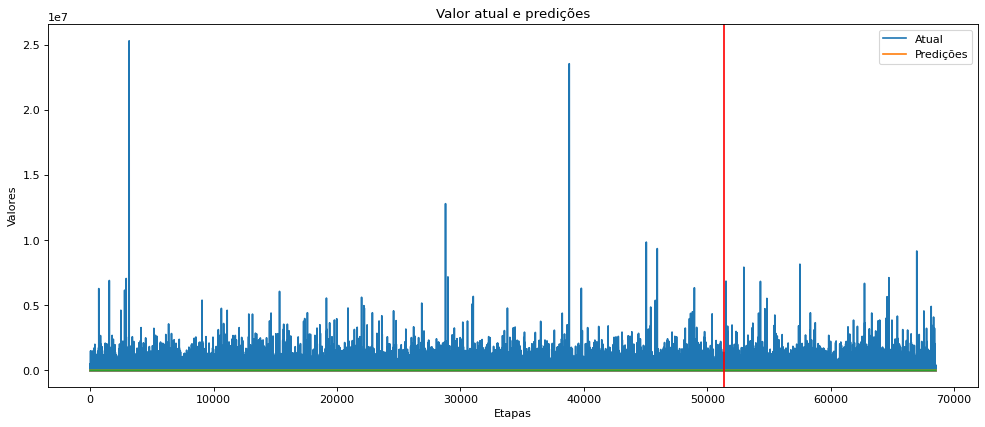

In [ ]:
import matplotlib.pyplot as plt

actual = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict).reshape(68509, 32)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(y_train), color='r')
plt.legend(['Atual', 'Predições'])
plt.xlabel('Etapas')
plt.ylabel('Valores')
plt.title('Valor atual e predições')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

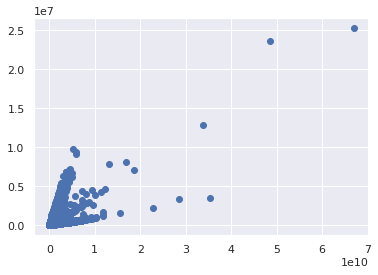

In [ ]:
plt.scatter(X, Y);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


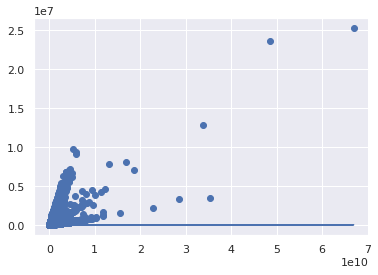

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X[:, np.newaxis], Y)
yfit = model.predict(Y[:, np.newaxis])

plt.plot(xfit, yfit);
plt.scatter(x, y)